<center><font size = "10"> Week 10 - Cells in Space <center>
<center><font size = "8">Tutorial 02: Rotating a morphology<center>

Most brain regions have a curved shape and the orientation of neurons varies along with this. In turn, this affects the connections which can be formed.

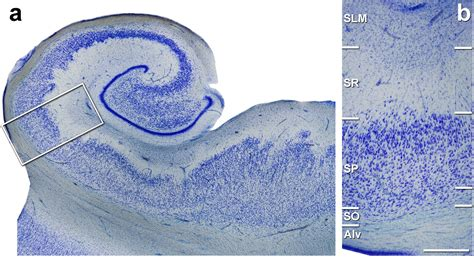

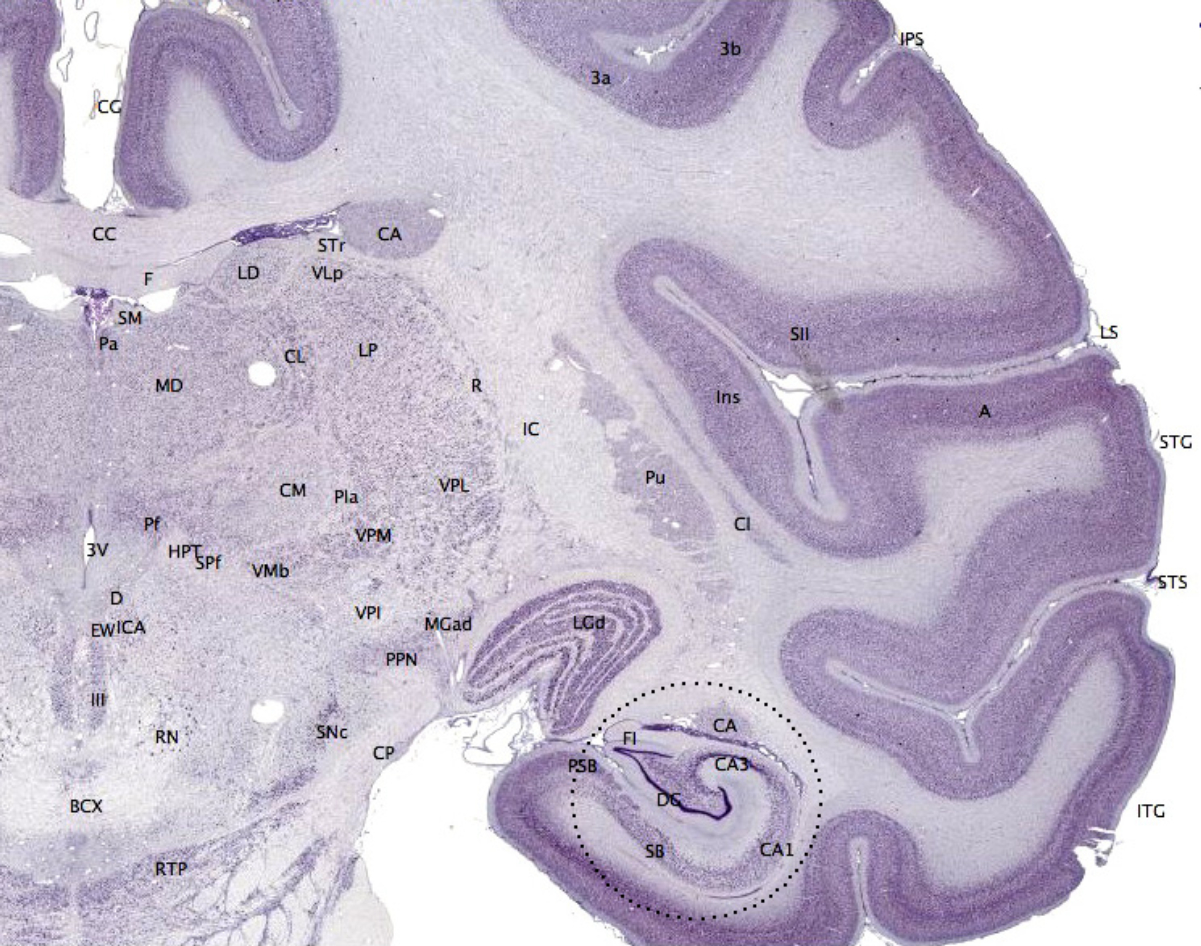


When creating simulations of a brain region this handled by having applying a rotation to the cells based on their location in the region.

In [1]:
# Useful functions
def shift_morphology(morph,shift):
    morph2 = morph.transform(lambda p: p + shift)
    return morph2
       
def center_morphology(morph):
    center = morph.soma.center.copy()
    return shift_morphology(morph,-center)

# Poorman's plotting of morphologies
def plot_morphology(morph, plane = 'XY',somaOnly = False):
    colors_dict={nm.BASAL_DENDRITE:'red', 
            nm.APICAL_DENDRITE:'green',
            nm.AXON:'blue',
            nm.SOMA:'black'}

    planes = { 'XY': [0,1], 'XZ': [0,2], 'YZ': [1,2], 'YX': [1,0], 'ZX': [2,0], 'ZY': [2,1] }
   
    if not somaOnly:
        for n in morph.neurites:
            pts = n.points[:,[0,1,2]]
            plt.scatter(pts[:,planes[plane][0]],pts[:,planes[plane][1]],s=1,c=colors_dict[n.type.value],marker='.')
    pts = morph.soma.center
    
    plt.scatter(pts[planes[plane][0]],pts[planes[plane][1]],c=colors_dict[nm.NeuriteType.soma.value],marker='D')
   
def plot_morphologies(morphlist,plane = 'XY',somaOnly = False):
    fig = plt.figure()
    fig.suptitle(plane)
    
    for i,m in enumerate(morphlist):
        plot_morphology(m, plane = plane, somaOnly = somaOnly)
       

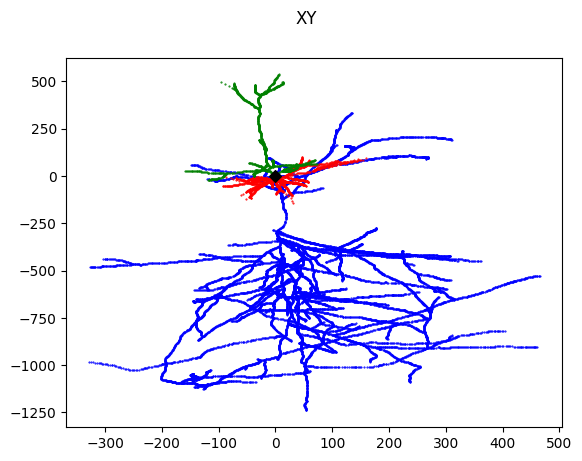

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import neurom as nm
# Load a morphology
morph = nm.load_morphology('Pyr_01.swc')
# Center morphology
morph=center_morphology(morph)

plot_morphologies([morph])

## 2D rotation around Z axis

In [3]:
import numpy as np
# Rotation matrix around Z axis, angle theta CCW (degrees)
def rotz(theta):
    radtheta = theta * np.pi / 180.0 # in radians
    R = np.array([[np.cos(radtheta),-np.sin(radtheta),0],
                  [np.sin(radtheta),np.cos(radtheta),0],
                  [0,0,1]])
    return R

R = rotz(90)
# Test
R.dot([1,0,0]) # = [0,1,0]

array([6.123234e-17, 1.000000e+00, 0.000000e+00])

In [4]:
# apply rotation matrix R
def rotate_morphology(morph,R):
    morph = morph.transform(lambda p: R.dot(p.T).T)
    return morph

def rotz_morphology(morph,theta):
    R = rotz(theta)
    return rotate_morphology(morph,R)

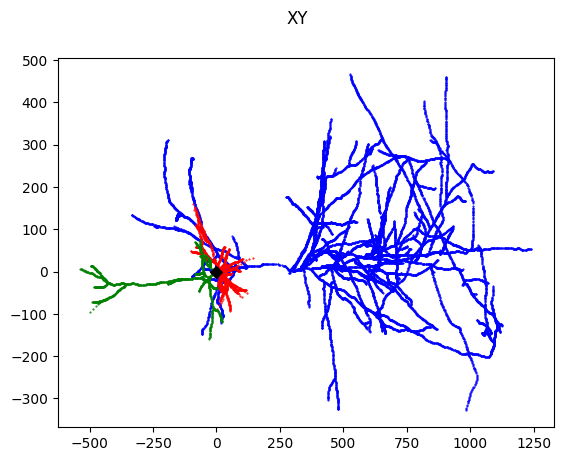

In [5]:
morph=rotz_morphology(morph,90)
plot_morphologies([morph])

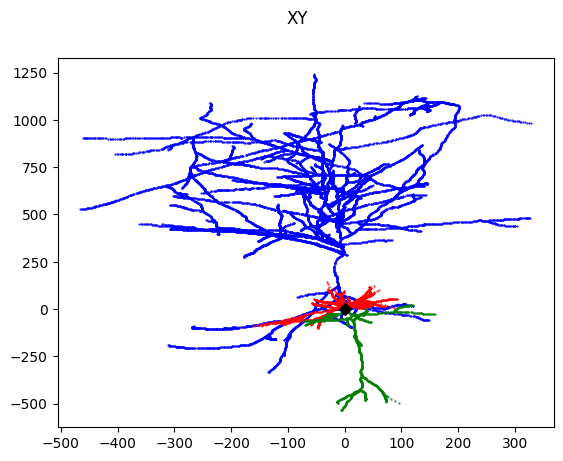

In [6]:
morph=rotz_morphology(morph,90)
plot_morphologies([morph])

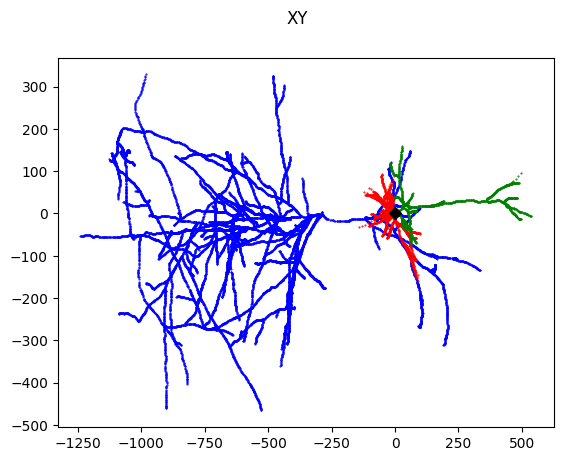

In [7]:
morph=rotz_morphology(morph,90)
plot_morphologies([morph])

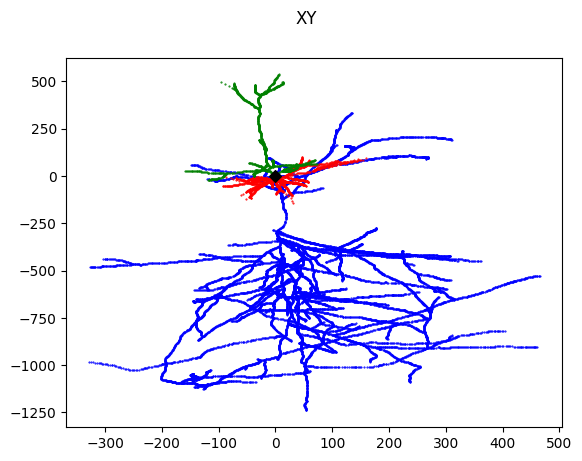

In [8]:
morph=rotz_morphology(morph,90)
plot_morphologies([morph])

## 3D rotation to align Y axis

In [9]:
def align_morphology_Y(morph,axis):
    # Rotation matrix that aligns the Y axis [0,1,0] to an arbitrary vector b (other than Y or -Y)
    # From https://math.stackexchange.com/a/476311
    a = np.array([0,1,0])

    b = np.array(axis) # target axis
    b = b / np.linalg.norm(b) # make unit norm

    v = np.cross(a,b)     # a x b
    s = np.linalg.norm(v) # ||v|| = sin(theta)
    c = a.dot(b)          # a . b = cos(theta)

    # Skew-symmetric cross-product matrix
    V = np.zeros((3,3))
    V[0,1] = -v[2]
    V[1,0] =  v[2]
    V[0,2] =  v[1]
    V[2,0] = -v[1]
    V[1,2] = -v[0]
    V[2,1] =  v[0]

    # Rotation matrix
    R = np.diag((1.0,1.0,1.0))
    R += V
    R += V.dot(V) * (1.0 - c) / (s * s)

    # Test
    if not np.max(R.dot(a) - b) < 1E-12:
        raise ValueError('Matrix not good!')
    
    # Rotate morphology
    return rotate_morphology(morph,R)

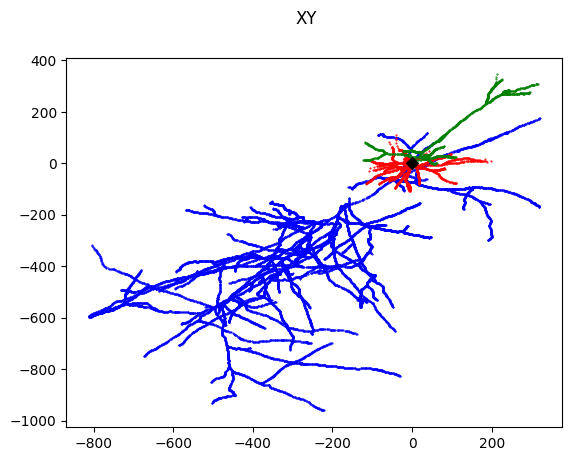

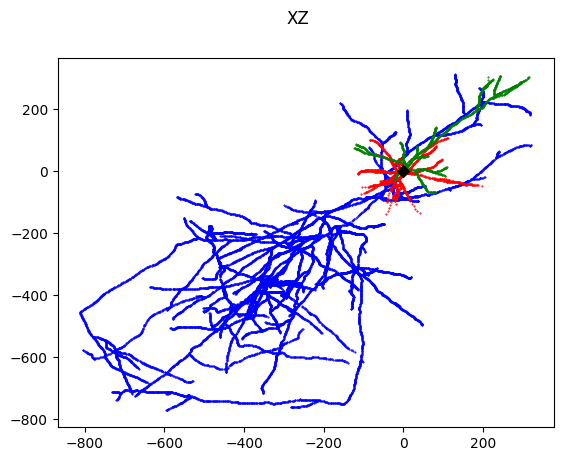

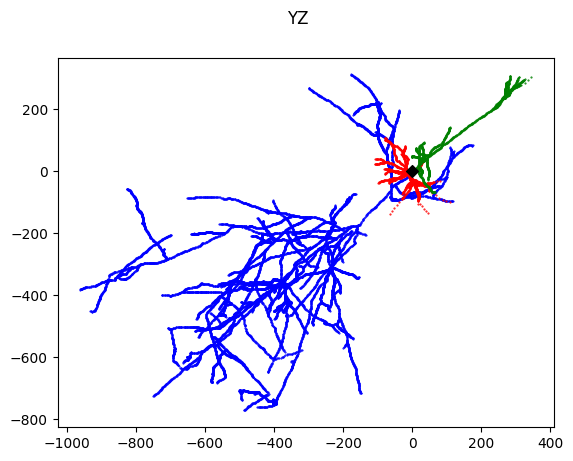

In [10]:
morph=align_morphology_Y(morph,[1,1,1])
# Plot all three planes
plot_morphologies([morph],plane = 'XY')
plot_morphologies([morph],plane = 'XZ')
plot_morphologies([morph],plane = 'YZ')